This script plot the difference between CTRL and CUX1 KD ATAC seq signal in human CD34+ HSPC for the CUX1-promotor bound loops and non-interacting loops. The loops are identified from CD34 HiC in Zhang 2020

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy

In [48]:
os.chdir("../../data/analysis_2_results")

import the count matrix from computeMatrix

In [50]:
interact = pd.read_csv("outMatrix_CD34_q30_srt_interact.tab",header = 0,sep = "\t")
non_interact = pd.read_csv("outMatrix_CD34_q30_srt_no_interact_fixed.tab",header = 0,sep = "\t")
#interact = pd.read_csv("CD34_ATAC_CUX1_interacting_loops_Heatmap_values.txt",header = 0,sep = "\t")
#non_interact = pd.read_csv("CD34_ATAC_non_CUX1_interacting_loops_Heatmap_values.txt",header = 0,sep = "\t")

In [51]:
interact

,BAMCompare_CD34_CTRL_q30_srt_nodup_noMITO,BAMCompare_CD34_CTRL_q30_srt_nodup_noMITO.1,BAMCompare_CD34_CTRL_q30_srt_nodup_noMITO.2,BAMCompare_CD34_CTRL_q30_srt_nodup_noMITO.3,BAMCompare_CD34_CTRL_q30_srt_nodup_noMITO.4,BAMCompare_CD34_CTRL_q30_srt_nodup_noMITO.5,BAMCompare_CD34_CTRL_q30_srt_nodup_noMITO.6,BAMCompare_CD34_CTRL_q30_srt_nodup_noMITO.7,BAMCompare_CD34_CTRL_q30_srt_nodup_noMITO.8,BAMCompare_CD34_CTRL_q30_srt_nodup_noMITO.9,...,BAMCompare_CD34_KD_q30_srt_nodup_noMITO.30,BAMCompare_CD34_KD_q30_srt_nodup_noMITO.31,BAMCompare_CD34_KD_q30_srt_nodup_noMITO.32,BAMCompare_CD34_KD_q30_srt_nodup_noMITO.33,BAMCompare_CD34_KD_q30_srt_nodup_noMITO.34,BAMCompare_CD34_KD_q30_srt_nodup_noMITO.35,BAMCompare_CD34_KD_q30_srt_nodup_noMITO.36,BAMCompare_CD34_KD_q30_srt_nodup_noMITO.37,BAMCompare_CD34_KD_q30_srt_nodup_noMITO.38,BAMCompare_CD34_KD_q30_srt_nodup_noMITO.39
0,0.7708,0.5139,0.4282,0.5139,0.3426,0.34260,0.3426,0.5139,0.3426,0.1713,...,1.1700,0.9840,1.1810,1.1810,0.9840,0.7872,0.3936,0.1968,0.1968,0.3936
1,0.3426,0.3426,0.3426,0.5139,0.3426,0.17130,0.0000,0.2834,0.7380,0.9093,...,0.9840,0.7872,0.3936,0.1968,0.1968,0.3936,0.5904,0.5904,0.7760,0.9615
2,0.9685,0.8565,1.0280,1.7660,2.8990,3.55200,2.9850,2.0230,1.3970,1.4230,...,1.4420,1.7370,1.8470,1.3550,0.8744,0.7647,1.1470,1.1360,0.7534,0.3823
3,1.6210,1.7920,1.5090,0.8829,0.3426,0.08565,0.4547,1.0810,1.7070,1.5940,...,1.1700,3.1970,5.1200,7.5010,9.7720,13.3900,18.0200,23.2100,28.1900,30.6500
4,9.7180,9.0070,8.0910,7.7480,7.0630,5.15200,3.6140,2.3320,1.9640,1.8220,...,0.1855,0.3711,0.3711,0.3711,0.3711,0.5566,0.7534,0.7647,0.7760,0.3936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1283,0.4282,0.5139,0.3426,0.3426,0.3426,0.51390,0.5139,0.5139,0.3426,0.1713,...,0.0000,0.0000,0.0000,0.1855,0.3711,0.3711,0.5679,0.7647,1.5180,1.5180
1284,0.0000,0.0000,0.9093,1.5350,1.8780,1.25200,0.9093,0.5667,0.2834,0.0000,...,1.7260,1.7490,1.7490,1.8250,1.9000,3.2560,4.3380,6.2950,7.6270,10.3600
1285,0.7972,0.9093,0.7380,0.4547,0.7972,1.14000,1.5940,1.4230,1.9900,1.8190,...,1.5410,1.1580,0.7760,0.7872,0.7872,0.7872,0.3936,0.1968,0.0000,0.0000
1286,0.3426,0.5139,0.5139,0.5139,0.5139,0.51390,0.9685,1.8780,2.3320,2.0490,...,0.0000,0.0000,0.1968,0.5792,1.1580,1.1580,0.9728,0.5904,0.6888,0.7872


In [52]:
non_interact

,BAMCompare_CD34_CTRL_q30_srt_nodup_noMITO,BAMCompare_CD34_CTRL_q30_srt_nodup_noMITO.1,BAMCompare_CD34_CTRL_q30_srt_nodup_noMITO.2,BAMCompare_CD34_CTRL_q30_srt_nodup_noMITO.3,BAMCompare_CD34_CTRL_q30_srt_nodup_noMITO.4,BAMCompare_CD34_CTRL_q30_srt_nodup_noMITO.5,BAMCompare_CD34_CTRL_q30_srt_nodup_noMITO.6,BAMCompare_CD34_CTRL_q30_srt_nodup_noMITO.7,BAMCompare_CD34_CTRL_q30_srt_nodup_noMITO.8,BAMCompare_CD34_CTRL_q30_srt_nodup_noMITO.9,...,BAMCompare_CD34_KD_q30_srt_nodup_noMITO.30,BAMCompare_CD34_KD_q30_srt_nodup_noMITO.31,BAMCompare_CD34_KD_q30_srt_nodup_noMITO.32,BAMCompare_CD34_KD_q30_srt_nodup_noMITO.33,BAMCompare_CD34_KD_q30_srt_nodup_noMITO.34,BAMCompare_CD34_KD_q30_srt_nodup_noMITO.35,BAMCompare_CD34_KD_q30_srt_nodup_noMITO.36,BAMCompare_CD34_KD_q30_srt_nodup_noMITO.37,BAMCompare_CD34_KD_q30_srt_nodup_noMITO.38,BAMCompare_CD34_KD_q30_srt_nodup_noMITO.39
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
577055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
577056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
577057,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


aggregate the RPKM values for all the bins(columns) for each region

In [53]:
interact_CTRL = interact.filter(regex = "CTRL").sum(axis = 1)
interact_KD = interact.filter(regex = "KD").sum(axis = 1)
interact_plot = pd.DataFrame({'CTRL':interact_CTRL,'KD':interact_KD})

In [54]:
non_interact_CTRL = non_interact.filter(regex = "CTRL").sum(axis = 1)
non_interact_KD = non_interact.filter(regex = "KD").sum(axis = 1)
non_interact_plot = pd.DataFrame({'CTRL':non_interact_CTRL,'KD':non_interact_KD})
#randomly sample 272 rows to size match with the interacting loops. This is because the variance of the interact loops are drastically higher than the non-interaction loops. t test has to assume euaal variance
non_interact_plot_sample = non_interact_plot#.sample(n = 3977)

Perform statistical test

In [55]:
scipy.stats.ttest_ind(non_interact_plot_sample['CTRL'],non_interact_plot_sample['KD'])

Ttest_indResult(statistic=43.413715373041114, pvalue=0.0)

In [56]:
scipy.stats.ttest_ind(interact_plot['CTRL'],interact_plot['KD'])

Ttest_indResult(statistic=4.410079545669657, pvalue=1.0757658154187705e-05)

Plot

In [57]:
#join the two data frame together for plotting
interact_plot['sample']="interact"
non_interact_plot_sample['sample']="non_interact"

In [58]:
interact_plot = pd.melt(interact_plot,id_vars='sample',var_name="condition",value_name="RPKM")
non_interact_plot_sample = pd.melt(non_interact_plot_sample,id_vars='sample',var_name="condition",value_name="RPKM")

In [59]:
final_plot=non_interact_plot_sample.append(interact_plot)
final_plot['log2_RPKM'] = np.log2(final_plot['RPKM'])

/Users/alexandregaubil/opt/anaconda3/envs/bioinformatics/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


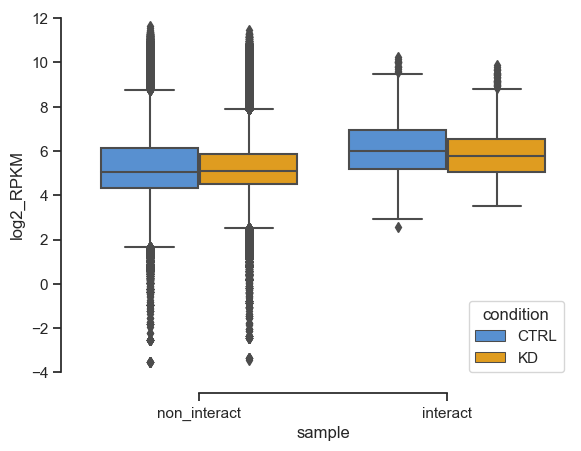

In [60]:
sns.set_theme(style="ticks")
my_pal = {"CTRL":"#448ee4","KD": "orange"}
sns.boxplot(x="sample", y="log2_RPKM",
            hue="condition",palette=my_pal,
            data=final_plot)
sns.despine(offset=10, trim=True)